Dana Rozenblum, Nitzan Tal

# Assignment 1 programming


This notebook shows examples of descriptive statistics and data visualization on a dataset about customers bank accounts.

The data is taken from the last Y-Data acceptance exam.

The goal of this notebook is to find insights about the data and, specifically, about relations between leaving the bank and other variables.

Import the packages used in this notebook

In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{: .2f}'.format  # show floats with 2 digits after dot
import matplotlib.pyplot as plt

Open the dataset and look at the first few rows. 

In [3]:
 
df = pd.read_csv('churn_data.csv')
print(df.shape)
df.head()


(8106, 11)


,RowNumber,CustomerId,CreditScore,Geography,Age,FeesCharges,NumOfApplications,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,588,France,42,27740.73,1,1,1,101348.88,1
1,2,15619304,359,France,42,34108.96,3,1,0,113931.57,1
2,3,15701354,701,France,39,95.44,2,1,0,93826.63,0
3,4,15574012,554,Spain,44,40364.28,2,1,1,149756.71,1
4,5,15592531,829,France,50,206.49,2,0,1,10062.80,0


# Features
•	RowNumber – (int) data string index

•	CustomerId – (int) unique customer identiﬁer

•	CreditScore – (int) credit score

•	Geography – (text) country of residence

•	Age – (int) age

•	FeesCharges – (ﬂoat) account fees and charges paid

•	NumOfApplications – (int) number of applications for banking products submitted

•	HasCrCard – (0/1) customer has a credit card

•	IsActiveMember – (0/1) customer’s activeness

•	EstimatedSalary – (ﬂoat) estimated salary

•	Exited – (0/1) customer has left bank


This (synthetic) dataset is a hypothetical sample of bank accounts. It contains details regarding the accounts of customers which according to a survey are strongly dissatisﬁed with the bank. The data also indicates whether they left the bank in the 3 months following the survey.

The goal of the analysis below is to explore these accounts and find relations between leaving the bank and other variables. An additional goal is to learn what variables are associated with paying lager fees.

Some hypotheses:

- Leaving the bank depends on age, country of residence and credit score and the fees one pays but doesn't rely on having a credit card, being active member or number of applications 
- Fees and charges ammount can be explained mostly by salary.
- Age correlates with salary.

# Dependencies between variables and leaving the bank

Mean, standard deviation, and quartiles for the numerical values:

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,FeesCharges,NumOfApplications,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8106.00,8106.00,8106.00,8106.00,8106.00,8106.00,8106.00,8106.00,8106.00,8106.00
mean,4053.50,15690634.87,646.48,38.77,11242.67,1.54,0.51,0.49,99980.07,0.25
std,2340.14,71923.88,100.76,11.02,11746.18,0.61,0.50,0.50,57628.96,0.43
min,1.00,15565701.00,350.00,18.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2027.25,15627996.00,582.00,31.00,2912.85,1.00,0.00,0.00,50762.64,0.00
50%,4053.50,15690948.50,652.00,37.00,7719.58,1.00,1.00,0.00,99796.85,0.00
75%,6079.75,15752577.75,718.00,44.00,15348.97,2.00,1.00,1.00,149547.25,0.00
max,8106.00,15815660.00,850.00,92.00,76351.97,4.00,1.00,1.00,199970.74,1.00


## Age

Our first assumption is that there is a dependency between age and leaving the bank. To visualize that we plot cumulative fraction of number of leaving sorted by age.
Here, we see that age does seem to affect probability of leaving: as we increase age window, the number of leaving in it does not increase proportionally to the number of all customers.

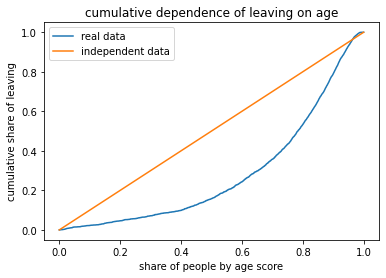

In [ ]:
plt.plot(np.linspace(0, 1, df.shape[0]), (df.sort_values('Age').Exited.cumsum() / df.Exited.sum()).values)
plt.plot([0, 1], [0, 1])
plt.legend(['real data', 'independent data'])
plt.xlabel('share of people by age score')
plt.ylabel('cumulative share of leaving')
plt.title('cumulative dependence of leaving on age');

The boxplot below further elaborate on the relation - the people that leave the bank are older in average than the people who stay. Note though that the variance and the many outliers may imply that the connection is not so strait-forward

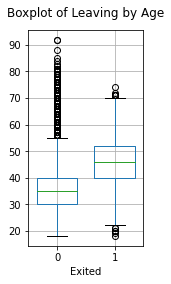

In [ ]:
df.boxplot(column='Age', by='Exited', figsize=(2,4), widths=0.7)
plt.title(None)
plt.suptitle('Boxplot of Leaving by Age');

Lets discretize the age into buckets and plot probability of leaving conditional on these buckets.
Indeed, the proporiton of leaving goes up with the age and highest at 53-58 years and than gradualy decreases.

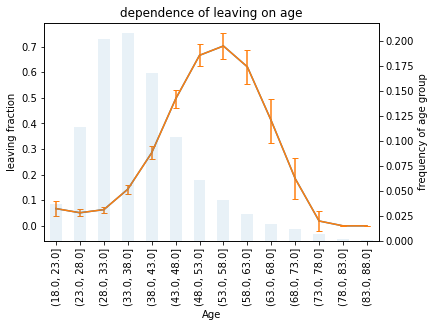

In [11]:
g = df.groupby(pd.cut(df.Age, np.linspace(18, 88, 15)))
m = g.Exited.mean()
m.plot()
stderr = g.Exited.std() / np.sqrt(g.Exited.count())
plt.errorbar(np.arange(m.shape[0]), m.values, stderr * 2, capsize=3)
plt.ylabel('leaving fraction')
(g.Exited.count() / df.shape[0]).plot.bar(secondary_y=True, alpha=0.1)
plt.xlabel('age group')
plt.ylabel('frequency of age group')
plt.title('dependence of leaving on age');

Note that the plot for the old ages is based on small number of samples as seen below.

In [ ]:
print(g.Exited.count())

Age
(18.0, 23.0]     297
(23.0, 28.0]     920
(28.0, 33.0]    1642
(33.0, 38.0]    1685
(38.0, 43.0]    1363
(43.0, 48.0]     842
(48.0, 53.0]     494
(53.0, 58.0]     326
(58.0, 63.0]     219
(63.0, 68.0]     134
(68.0, 73.0]      92
(73.0, 78.0]      53
(78.0, 83.0]      13
(83.0, 88.0]       3
Name: Exited, dtype: int64


## Credit Score

Now we check the assumption that there is a dependency between credit score and leaving the bank. To visualize that we plot cumulative fraction of number of leaving sorted by credit score. Here, we see that credit score does seem to affect probability of leaving: as we increase credit score window, the number of leaving in it does not increase proportionally to the number of all customers.

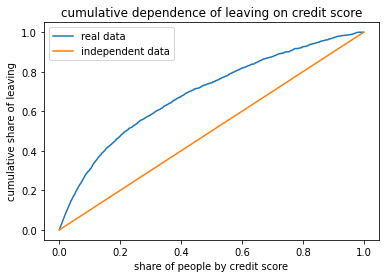

In [ ]:
plt.plot(np.linspace(0, 1, df.shape[0]), (df.sort_values('CreditScore').Exited.cumsum() / df.Exited.sum()).values)
plt.plot([0, 1], [0, 1])
plt.legend(['real data', 'independent data'])
plt.xlabel('share of people by credit score')
plt.ylabel('cumulative share of leaving')
plt.title('cumulative dependence of leaving on credit score');

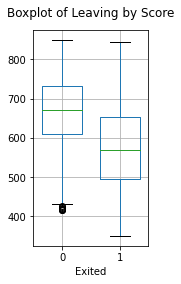

In [ ]:
df.boxplot(column='CreditScore', by='Exited', figsize=(2,4), widths=0.7)
plt.title(None)
plt.suptitle('Boxplot of Leaving by Score');

People that left the bank have lower credir score on average.

Lets discretize the credit score into buckets and plot probability of leaving conditional on these buckets. Indeed, the lower the credit score is, the proportion of leaving is higher.

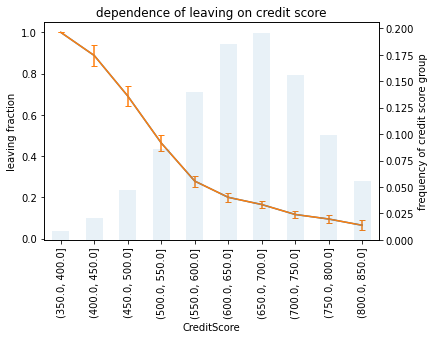

In [12]:
g = df.groupby(pd.cut(df.CreditScore, np.linspace(350, 850, 11)))
m = g.Exited.mean()
m.plot()
stderr = g.Exited.std() / np.sqrt(g.Exited.count())
plt.errorbar(np.arange(m.shape[0]), m.values, stderr * 2, capsize=3)
plt.ylabel('leaving fraction')
(g.Exited.count() / df.shape[0]).plot.bar(secondary_y=True, alpha=0.1)
plt.xlabel('credit score group')
plt.ylabel('frequency of credit score group')
plt.title('dependence of leaving on credit score');

## Country of Residence

This is the cross table for Geography and Exited flag:

In [ ]:
a = pd.pivot_table(df, index='Exited', columns='Geography', values='Age', aggfunc=len, margins=True)
a

Geography,France,Germany,Spain,All
Exited,,,,
0,3017,1653,1450,6120
1,548,1161,277,1986
All,3565,2814,1727,8106


Normalizing the table we see that 41% of the customers from Germany left the bank while only 15-16% from France and Spain did so. So the probability of leaving is higher for Germany residents.

In [ ]:
a / a.loc[ 'All', :]

Geography,France,Germany,Spain,All
Exited,,,,
0,0.85,0.59,0.84,0.75
1,0.15,0.41,0.16,0.25
All,1.00,1.00,1.00,1.00


Given the effect we saw before of Age on leaving, it may be intresting to see how thsese 2 effects interact with each other, e.g does the effect of the country is equal for all age groups? does it exist in all age groups?

Geography     France  Germany  Spain
Age                                 
(18.0, 23.0]    0.01     0.25   0.01
(23.0, 28.0]    0.00     0.17   0.02
(28.0, 33.0]    0.01     0.20   0.01
(33.0, 38.0]    0.02     0.35   0.03
(38.0, 43.0]    0.18     0.44   0.17
(43.0, 48.0]    0.44     0.60   0.42
(48.0, 53.0]    0.65     0.71   0.62
(53.0, 58.0]    0.67     0.78   0.62
(58.0, 63.0]    0.62     0.67   0.51
(63.0, 68.0]    0.24     0.69   0.25
(68.0, 73.0]    0.02     0.48   0.06
(73.0, 78.0]    0.00     0.05   0.00
(78.0, 83.0]    0.00     0.00   0.00
(83.0, 88.0]    0.00     0.00   0.00


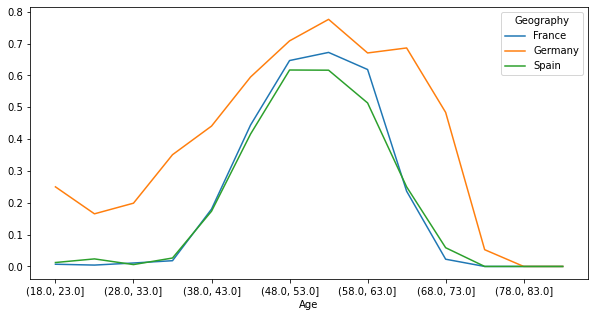

In [ ]:
g = df.groupby(['Geography',pd.cut(df.Age, np.linspace(18,88,15))])
m = g.Exited.mean().unstack(level=0)
print(m)
m.plot(figsize=(10,5))




The dominance of age group 53-58 retains accross all countries, actually the pattern that we saw before for the age of rise before that group and fall after remains within all countries but in Germany a chance for leaving is high almost in all age groups or at least it exist when it is actually non-existant in France and Spain.  

Another intresting thing to check is whether this effect of the country of residence is mediated by a diffrent variable i.e in Germany the fees (which we found to be related to leaving) are higher or germans have lower credit score in average.   

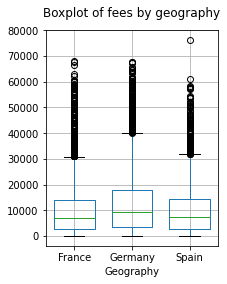

In [ ]:
df.boxplot(column='FeesCharges', by='Geography', figsize=(3,4), widths=0.7)
plt.title(None)
plt.suptitle('Boxplot of fees by geography');

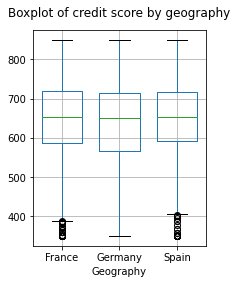

In [ ]:
df.boxplot(column='CreditScore', by='Geography', figsize=(3,4), widths=0.7)
plt.title(None)
plt.suptitle('Boxplot of credit score by geography');

From the above 2 boxplots it seems that the effect of country of residence cannot be fully explained by these other variables.

## Fees and Charges

Now we check the assumption that there is a dependency between fees charges and leaving the bank. To visualize that we plot cumulative fraction of number of leaving sorted by fees charges. Here, we see that fees charges do seem to affect probability of leaving: as we increase fees charges window, the number of leaving in it does not increase proportionally to the number of all customers.

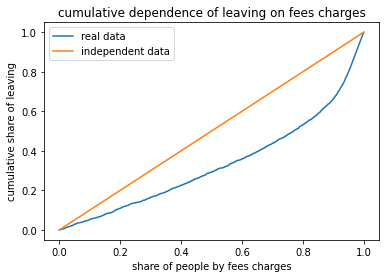

In [ ]:
plt.plot(np.linspace(0, 1, df.shape[0]), (df.sort_values('FeesCharges').Exited.cumsum() / df.Exited.sum()).values)
plt.plot([0, 1], [0, 1])
plt.legend(['real data', 'independent data'])
plt.xlabel('share of people by fees charges')
plt.ylabel('cumulative share of leaving')
plt.title('cumulative dependence of leaving on fees charges');

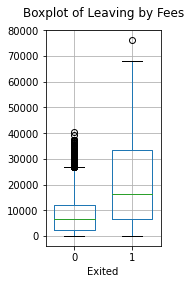

In [ ]:
df.boxplot(column='FeesCharges', by='Exited', figsize=(2,4), widths=0.7)
plt.title(None)
plt.suptitle('Boxplot of Leaving by Fees');

Lets discretize the fees charges amounts into buckets and plot probability of leaving conditional on these buckets. Indeed, as the fees go higher so does the leaving rate, and at around 40,000 fees charges this rate stabilies at the highest value.

Mean, standard deviation, and quartiles for the numerical values:

FeesCharges
(0.0, 10907.424]          4713
(10907.424, 21814.849]    1926
(21814.849, 32722.273]     578
(32722.273, 43629.697]     293
(43629.697, 54537.121]     173
(54537.121, 65444.546]      67
(65444.546, 76351.97]        8
Name: Exited, dtype: int64


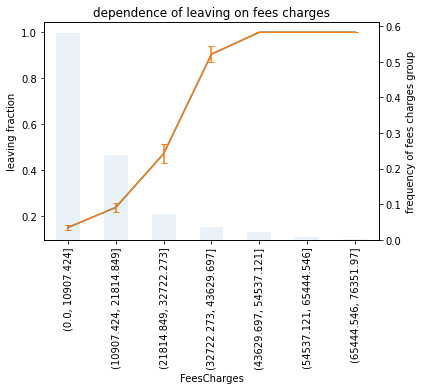

In [13]:
g = df.groupby(pd.cut(df.FeesCharges, np.linspace(0, 76351.97, 8)))
m = g.Exited.mean()
m.plot()
stderr = g.Exited.std() / np.sqrt(g.Exited.count())
plt.errorbar(np.arange(m.shape[0]), m.values, stderr * 2, capsize=3)
plt.ylabel('leaving fraction')
(g.Exited.count() / df.shape[0]).plot.bar(secondary_y=True, alpha=0.1)
plt.xlabel('fees charges group')
plt.ylabel('frequency of fees charges group')
plt.title('dependence of leaving on fees charges');
print(g.Exited.count())


Note that the distribuation of fees is very sqewed to the left - as we can see the first 2 bins above contain most of the data,  hence it worth verifing that we not missing any intersting things in these bins due to their size.

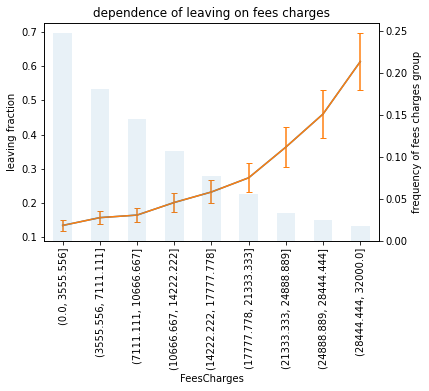

In [14]:

g = df.groupby(pd.cut(df.FeesCharges, np.linspace(0, 32000, 10)))
m = g.Exited.mean()
m.plot()
stderr = g.Exited.std() / np.sqrt(g.Exited.count())
plt.errorbar(np.arange(m.shape[0]), m.values, stderr * 2, capsize=3)
plt.ylabel('leaving fraction')
(g.Exited.count() / df.shape[0]).plot.bar(secondary_y=True, alpha=0.1)
plt.xlabel('fees charges group')
plt.ylabel('frequency of fees charges group')
plt.title('dependence of leaving on fees charges');

## Holding a Credit Card

This is the cross table for holding a credit card and Exited flag:

In [ ]:
a = pd.pivot_table(df, index='Exited', columns='HasCrCard', values='Age', aggfunc=len, margins=True)
a

HasCrCard,0,1,All
Exited,,,
0,2994,3126,6120
1,997,989,1986
All,3991,4115,8106


Normalizing the table we see that the proportion of leaving is almost the same between the two groups. So we cannot assume a connection between holding a credit card or not to leaving.

In [ ]:
a / a.loc[ 'All', :]

HasCrCard,0,1,All
Exited,,,
0,0.75,0.76,0.75
1,0.25,0.24,0.25
All,1.00,1.00,1.00


## Salary

Now we check the assumption that there is a dependency between the salary amount and leaving the bank. To visualize that we plot cumulative fraction of number of leaving sorted by salary.
Here, we see that salary does not seem to affect probability of leaving: as we increase salary window window, the number of exited in it increases proportionally to the number of all customers.

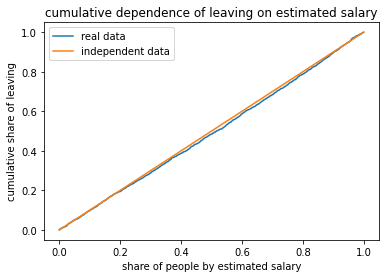

In [ ]:
plt.plot(np.linspace(0, 1, df.shape[0]), (df.sort_values('EstimatedSalary').Exited.cumsum() / df.Exited.sum()).values)
plt.plot([0, 1], [0, 1])
plt.legend(['real data', 'independent data'])
plt.xlabel('share of people by estimated salary')
plt.ylabel('cumulative share of leaving')
plt.title('cumulative dependence of leaving on estimated salary');

When we discretize the estimated salary to buckets we see that the proporiton of the leaving is roughly the same for all age buckets.

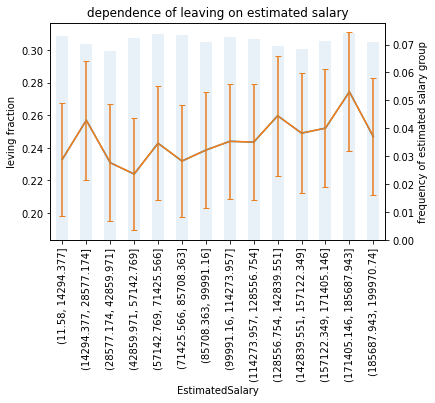

In [16]:
g = df.groupby(pd.cut(df.EstimatedSalary, np.linspace(11.58, 199970.74, 15)))
m = g.Exited.mean()
m.plot()
stderr = g.Exited.std() / np.sqrt(g.Exited.count())
plt.errorbar(np.arange(m.shape[0]), m.values, stderr * 2, capsize=3)
plt.ylabel('leving fraction')
(g.Exited.count() / df.shape[0]).plot.bar(secondary_y=True, alpha=0.1)
plt.xlabel('estimated salary group')
plt.ylabel('frequency of estimated salary group')
plt.title('dependence of leaving on estimated salary');

Another proof  - no difference between the average salaries of the 2 groups

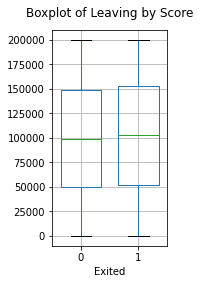

In [ ]:
df.boxplot(column='EstimatedSalary', by='Exited', figsize=(2,4), widths=0.7)
plt.title(None)
plt.suptitle('Boxplot of Leaving by Salary');

# Number of applications
No difference between the gropus in this variable

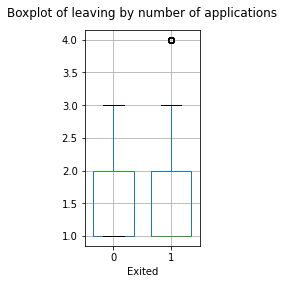

In [ ]:
df.boxplot(column='NumOfApplications', by='Exited', figsize=(2,4), widths=0.7)
plt.title(None)
plt.suptitle('Boxplot of leaving by number of applications');

# Is active member
No difference between the gropus in this variable

In [ ]:
a = pd.pivot_table(df, index='Exited', columns='IsActiveMember', values='Age', aggfunc=len, margins=True)
a / a.loc[ 'All', :]


IsActiveMember,0,1,All
Exited,,,
0,0.75,0.76,0.75
1,0.25,0.24,0.25
All,1.00,1.00,1.00


## **Correlations**

First. let's create a correaltion table

In [ ]:
df[['Age', 'EstimatedSalary', 'CreditScore', 'FeesCharges']].corr()


,Age,EstimatedSalary,CreditScore,FeesCharges
Age,1.00,-0.00,-0.20,0.16
EstimatedSalary,-0.00,1.00,-0.01,0.56
CreditScore,-0.20,-0.01,1.00,-0.12
FeesCharges,0.16,0.56,-0.12,1.00


# Age and Fees


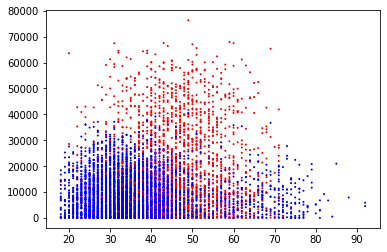

In [ ]:
plt.scatter(df.Age, df.FeesCharges, s=1, c=df.Exited.apply(lambda x: 'r' if x==1 else 'b'));
 

The red dots above stand for the people that exited, blue for those who stay. As we saw from the table - no correlation. It is nice to see the effect of high fees on exiting and the effect of Age - in the group of 50-60 we see red dots in small fees as well!

# Correlation between fees and charges amount to salary

We want to check if customers with higher salary pay larger fees amount.
The correlation is 0.56 but it is hard to identify a clear answer. We can see that higher fees are paid by higher salaries but part of the high salaries are still paying low fees.

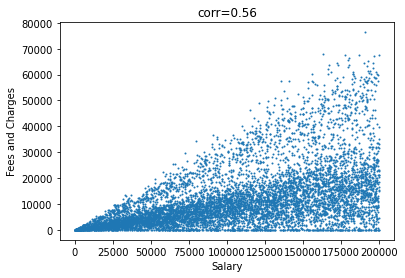

In [ ]:
plt.title('corr={:2.2f}'.format(np.corrcoef(df['EstimatedSalary'], df['FeesCharges'])[0, 1]))
plt.xlabel('Salary'), plt.ylabel('Fees and Charges')
plt.scatter(df.EstimatedSalary,df.FeesCharges, s=1);

# Correlation between Age and salary

We want to check if age is related to salary amount. Our assumption is wrong, there is no correlation.

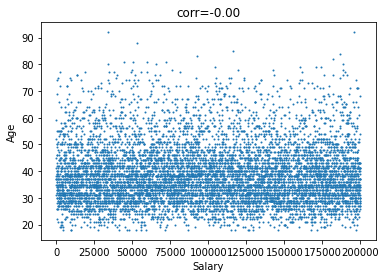

In [ ]:
plt.title('corr={:2.2f}'.format(np.corrcoef(df['EstimatedSalary'], df['Age'])[0, 1]))
plt.xlabel('Salary'), plt.ylabel('Age')
plt.scatter(df.EstimatedSalary,df.Age, s=1);